In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_63621_G')

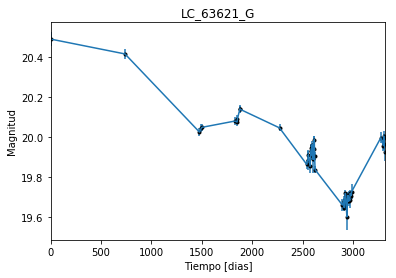

In [2]:
data = np.genfromtxt('LC_63621_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_63621_G')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

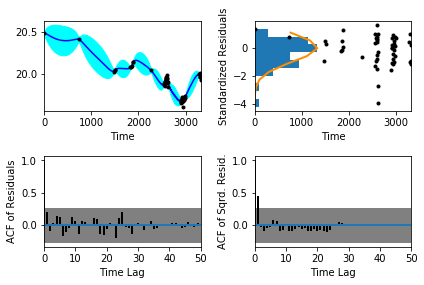

In [5]:
sample.assess_fit()

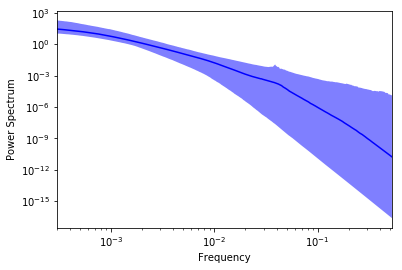

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)


Text(0.5,1,'LC_63621_G')

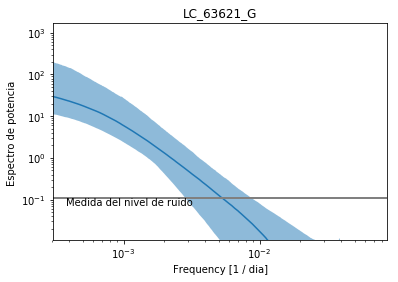

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_63621_G')

Text(0.5,1,'Prediccion , valor esperado LC_63621_G')

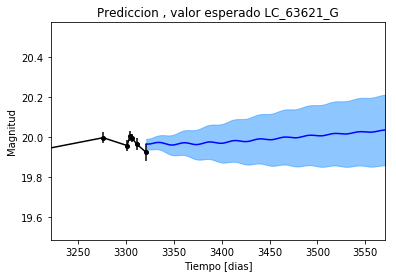

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_63621_G')

Text(0.5,1,'Prediccion, Caminos simulados  LC_63621_G')

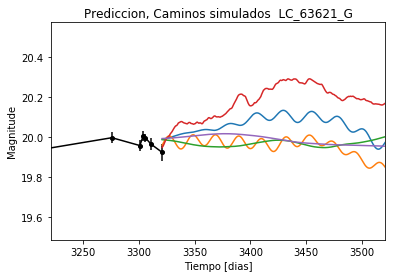

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_63621_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_63621_G')

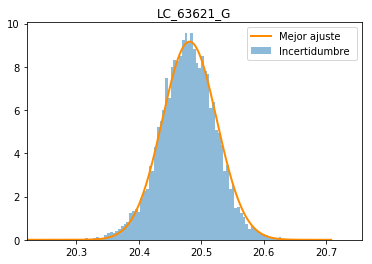

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_63621_G')

Text(0.5,1,'Interpolacion, camino simulado LC_63621_G')

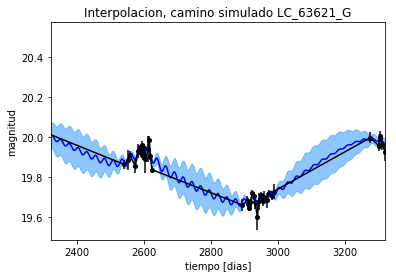

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_63621_G')

Text(0.5,1,'Interpolacion, camino simulado LC_63621_G')

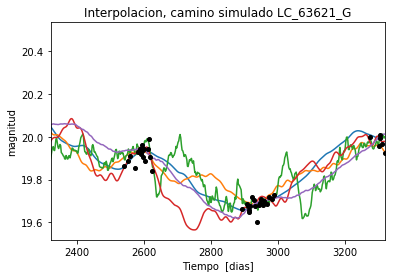

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_63621_G')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 451.429943976
Median: 0.0184514898347
Standard deviation: 0.198798706182
68% credibility interval: [ 0.00107975  0.22012943]
95% credibility interval: [  3.63276288e-04   7.80897221e-01]
99% credibility interval: [  3.21175782e-04   9.93422551e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 269.421649027
Median: 0.00269961119756
Standard deviation: 0.0963305487807
68% credibility interval: [ 0.00043279  0.05139625]
95% credibility interval: [ 0.00031573  0.30699122]
99% credibility interval: [  3.05154580e-04   6.72195804e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 478.593612184
Median: 0.0296691958462
Standard 

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 397.525958242
Median: 105.084682131
Standard deviation: 2.21742760732
68% credibility interval: [ 102.9118542   107.30867606]
95% credibility interval: [ 100.30917853  108.65006261]
99% credibility interval: [  98.25758458  110.12204356]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 205.450981323
Median: 0.799337276016
Standard deviation: 2.3718882989
68% credibility interval: [ 0.04878114  4.04518174]
95% credibility interval: [ 0.01254049  8.58563253]
99% credibility interval: [  9.58928402e-03   1.08633762e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 151.124111509
Median: 0.646244649981
Standard deviation: 10.5694695818
68% credibility interval: [ 0.0585138   9.63072335]
95% credibility interval: [  3.40

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1387.59916037
Median: 1.88231403455e-32
Standard deviation: 4.94197089478e+85
68% credibility interval: [  1.74196999e-69   2.30183623e-07]
95% credibility interval: [  2.33620905e-100   2.95160938e+001]
99% credibility interval: [  2.49347380e-129   3.96196241e+002]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2538.30189788
Median: 20.1273101405
Standard deviation: 0.131258698322
68% credibility interval: [ 20.01460115  20.24085829]
95% credibility interval: [ 19.88033617  20.39133209]
99% credibility interval: [ 19.73318419  20.54133138]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 162.374403365
Median: 0.0400585034013
Standard deviation: 0.25051967282
68% credibility interval: [ 0.          0.38544605]
95% credibility interval: [ 0.        0.905699]
99% credibility interval: [ 0.          1.01465575]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 162.374403365
Median: 0.0400585034013
Standard deviation: 0.25051967282
68% credibility interval: [ 0.          0.38544605]
95% credibility interval: [ 0.        0.905699]
99% credibility interval: [ 0.          1.01465575]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1818.1425965
Median: 0.0
Standard deviation: 0.000194699269216
68% credibility i

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 397.525958242
Median: 105.084682131
Standard deviation: 2.21742760732
68% credibility interval: [ 102.9118542   107.30867606]
95% credibility interval: [ 100.30917853  108.65006261]
99% credibility interval: [  98.25758458  110.12204356]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 549.6967331
Median: 0.0560386957016
Standard deviation: 0.0824739594644
68% credibility interval: [ 0.03288189  0.11314727]
95% credibility interval: [ 0.02310651  0.29715915]
99% credibility interval: [ 0.01874421  0.51201013]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 309.085017331
Median: 1.10567468189
Standard deviation: 0.234106011269
68% credibility interval: [ 0.87828913  1.35312428]
95% credibility interval: [ 0.72336351  1.61616921]
99% credibility interval: [ 0.66005115  1.8214474 ]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 172.781175958
Median: 0.000403337986029
Standard deviation: 0.271825861935
68% credibility interval: [  1.58409798e-05   2.09875578e-02]
95% credibility interval: [  4.58215309e-07   8.05475040e-01]
99% credibility interval: [  1.19474166e-07   1.96750066e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 451.429943976
Median: (-0.115934129825-0.859516764971j)
Standard deviation: 2.00945099374
68% credibility interval: [-1.38311402-1.11487359j -0.00678424-4.71662061j]
95% credibility interval: [ -4.90652195e+00-0.59301993j  -2.28253224e-03-3.07198559j]
99% credibility interval: [ -6.24185798e+00+0.j          -2.01800696e-03-0.22626503j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 269.421649027
Median: (-0.0169621574116+2.60082991871j)
Standard deviation: 1.68642005873
68% credibility interval: [-0.32293216+0.22846756j -0.00271931+1.28473312j]
95% credibility interval: [-1.92888275+0.58745337j -0.00198377+0.j        ]
99% credibility interval: [ -4.22353080e+00+2.90235304j  -1.91734277e-03+0.j        ]
Posterior summ